In [1]:
import pandas as pd 
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
class Read_And_EDA:
    # Define a function to read files of any extension
    def readFile(self,fileNmae):
        df=None 
        extension = fileNmae.split('.')[-1]
        try:
            if extension == 'csv':
                df=pd.DataFrame(pd.read_csv(fileNmae))
            elif extension == 'xls' or extension == 'xlsx':
                df=pd.DataFrame(pd.read_excel(fileNmae))
            elif extension == 'json':
                df=pd.DataFrame(pd.read_json(fileNmae))
            elif extension == 'sql':
                df=pd.DataFrame(pd.read_sql(fileNmae))
            elif extension == 'html':
                df=pd.DataFrame(pd.read_html(fileNmae))
            elif extension == 'feather':
                df=pd.DataFrame(pd.read_feather(fileNmae))
            elif extension == 'spss':
                df=pd.DataFrame(pd.read_spss(fileNmae))
            else:
                return 'Sorry, I can only read files with the extension: .csv, .xls or .xlsx, .json, .sql, .html, .feather, .spss'
        except FileNotFoundError :
            print('The file does not exist or you made a mistake in the file name')
        return df
    # Define a function to do EDA on the Data
    def do_EDA(self,unclean_data):
        empty_cols=unclean_data.isnull().sum()
        column_length = len(unclean_data)


        # Identify the first column containing "id" or "ID" in its name (case-insensitive)
        id_column = next((col for col in unclean_data.columns if "id" in col.lower() or "id" in col.lower()), None)

        # Drop the identified column if it exists
        if id_column:
            unclean_data.drop(columns=[id_column], inplace=True)
            print(f"Dropped column '{id_column}' because its name contains 'id' or 'ID' (case-insensitive).")
        else:
            print("No column found containing 'id' or 'ID' in its name (case-insensitive).")



        if unclean_data.isnull().any().any():
            # Calculate 25% of the column length
            threshold = 0.25 * column_length

            # Check if the number of empty cells in each column is greater than 25% of the column length
            columns_to_drop = [col for col, count in empty_cols.items() if count > threshold]

            if columns_to_drop:
                print("Columns with more than 25% empty cells:", columns_to_drop ,"We droped these columns")
                clean_data = unclean_data.drop(columns=columns_to_drop)
                # Select columns with remaining empty cells
                remaining_empty_cols = clean_data.columns[clean_data.isnull().any()]
                for col in remaining_empty_cols:
                    if clean_data[col].dtype == 'object':
                        # Fill empty cells in text data with the most frequent value
                        most_frequent_value = clean_data[col].mode()[0]
                        clean_data[col].fillna(most_frequent_value, inplace=True)
                    elif clean_data[col].nunique() == 2:
                        # Fill empty cells in binary numerical data with the most frequent value
                        most_frequent_value = clean_data[col].mode()[0]
                        clean_data[col].fillna(most_frequent_value, inplace=True)
                    else:
                        # Fill empty cells in numerical data with the mean
                        mean_value = clean_data[col].mean()
                        clean_data[col].fillna(mean_value, inplace=True)

                # Verify that all empty cells have been filled
                if not clean_data.isnull().any().any():
                    print("All empty cells have been filled.")
                else:
                    print("Some empty cells remain.")
                # Iterate over each column
                for col in clean_data.columns:
                    if clean_data[col].dtype == 'object':
                        if clean_data[col].nunique() == 2:
                            # Label encode binary text data
                            le = LabelEncoder()
                            clean_data[col] = le.fit_transform(clean_data[col])
                        else:
                            # One-hot encode non-binary text data
                            clean_data = pd.get_dummies(clean_data, columns=[col])
                # Verify the encoded DataFrame
                print("Encoded DataFrame:")
                print(clean_data.head())
                title = " عرض جدول الترابط بين الاعمدة للبيانات "
                print("=" * 20 + title + "=" * 20)
                clean_data.columns
                plt.figure(figsize=(10,10))
                sns.heatmap(clean_data.corr(),annot =True)
                plt.show()
                return clean_data
            else:
                print("No columns have more than 25% empty cells.We will fill the empty cells with appropriate content") 
                # Select columns with remaining empty cells
                remaining_empty_cols = clean_data.columns[clean_data.isnull().any()]
                for col in remaining_empty_cols:
                    if clean_data[col].dtype == 'object':
                        # Fill empty cells in text data with the most frequent value
                        most_frequent_value = clean_data[col].mode()[0]
                        clean_data[col].fillna(most_frequent_value, inplace=True)
                    elif clean_data[col].nunique() == 2:
                        # Fill empty cells in binary numerical data with the most frequent value
                        most_frequent_value = clean_data[col].mode()[0]
                        clean_data[col].fillna(most_frequent_value, inplace=True)
                    else:
                        # Fill empty cells in numerical data with the mean
                        mean_value = clean_data[col].mean()
                        clean_data[col].fillna(mean_value, inplace=True)

                # Verify that all empty cells have been filled
                if not clean_data.isnull().any().any():
                    print("All empty cells have been filled.")
                else:
                    print("Some empty cells remain.")
                # Iterate over each column
                for col in clean_data.columns:
                    if clean_data[col].dtype == 'object':
                        if clean_data[col].nunique() == 2:
                            # Label encode binary text data
                            le = LabelEncoder()
                            clean_data[col] = le.fit_transform(clean_data[col])
                        else:
                            # One-hot encode non-binary text data
                            clean_data = pd.get_dummies(clean_data, columns=[col])
                # Verify the encoded DataFrame
                print("Encoded DataFrame:")
                print(clean_data.head())
                title = " عرض جدول الترابط بين الاعمدة للبيانات "
                print("=" * 20 + title + "=" * 20)
                clean_data.columns
                plt.figure(figsize=(10,10))
                sns.heatmap(clean_data.corr(),annot =True)
                plt.show()
                return clean_data
        else:
            print("There are no empty cells in this Data. Data is Cleand")
            # Iterate over each column
            clean_data=unclean_data
            for col in clean_data.columns:
                if clean_data[col].dtype == 'object':
                    if clean_data[col].nunique() == 2:
                        # Label encode binary text data
                        le = LabelEncoder()
                        clean_data[col] = le.fit_transform(clean_data[col])
                    else:
                        # One-hot encode non-binary text data
                        clean_data = pd.get_dummies(clean_data, columns=[col])
            # Verify the encoded DataFrame
            print("Encoded DataFrame:")
            print(clean_data.head())
            title = " عرض جدول الترابط بين الاعمدة للبيانات "
            print("=" * 20 + title + "=" * 20)
            clean_data.columns
            plt.figure(figsize=(10,10))
            sns.heatmap(clean_data.corr(),annot =True)
            plt.show()
            return clean_data

In [4]:
class AutoML:
    def __init__(self, data, target_column):
        self.data = data
        self.target_column = target_column
        self.task = self.infer_task()

    def preprocess_data(self):
        # Split data into features and target
        X = self.data.drop(columns=[self.target_column])
        y = self.data[self.target_column]
        return X, y

    def infer_task(self):
        # Encode the target column
        le = LabelEncoder()
        encoded_target = le.fit_transform(self.data[self.target_column])

        # Count unique values after encoding
        unique_values = len(pd.unique(encoded_target))

        # Infer task based on the number of unique values after encoding
        if unique_values == 2:
            return 'classification'
        elif unique_values > 2:
            return 'classification'
        else:
            return 'regression'


    def train_model(self, model, X_train, y_train, X_test, y_test):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        if self.task == 'classification':
            metric = accuracy_score(y_test, predictions)
        elif self.task == 'regression':
            metric = mean_squared_error(y_test, predictions)
        return metric

    def find_best_model(self):
        X, y = self.preprocess_data()

        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Select models based on the inferred task
        if self.task == 'classification':
            models = {
                "Random Forest": RandomForestClassifier(),
                "Logistic Regression": LogisticRegression(),
                "SVM": SVC(),
                "Decision Tree": DecisionTreeClassifier()
            }
        elif self.task == 'regression':
            models = {
                "Random Forest": RandomForestRegressor(),
                "Linear Regression": LinearRegression(),
                "SVR": SVR(),
                "Decision Tree": DecisionTreeRegressor()
            }
        else:
            raise ValueError("Unsupported task")

        best_model = None
        best_metric = float('inf') if self.task == 'regression' else 0.0

        # Train and evaluate each model
        for model_name, model in models.items():
            metric = self.train_model(model, X_train, y_train, X_test, y_test)
            print(f"{model_name} metric: {metric}")

            # Update best model if necessary
            if (self.task == 'classification' and metric > best_metric) or (self.task == 'regression' and metric < best_metric):
                best_metric = metric
                best_model = model_name

        print(f"Best model: {best_model} with metric: {best_metric}")
        return best_model , best_metric



Dropped column 'Loan_ID' because its name contains 'id' or 'ID' (case-insensitive).
Columns with more than 25% empty cells: ['Gender', 'Loan_Amount_Term'] We droped these columns
All empty cells have been filled.
Encoded DataFrame:
   Married  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  \
0        1          0              0      4583.000000             1508.0   
1        1          0              1      3581.371053                0.0   
2        1          1              0      2583.000000             2358.0   
3        0          0              0      6000.000000                0.0   
4        1          1              0      2333.000000             1516.0   

   LoanAmount  Credit_History  Loan_Status  Dependents_0  Dependents_1  \
0         128             1.0            0         False          True   
1          66             1.0            1          True         False   
2         120             1.0            1          True         False   
3         141  

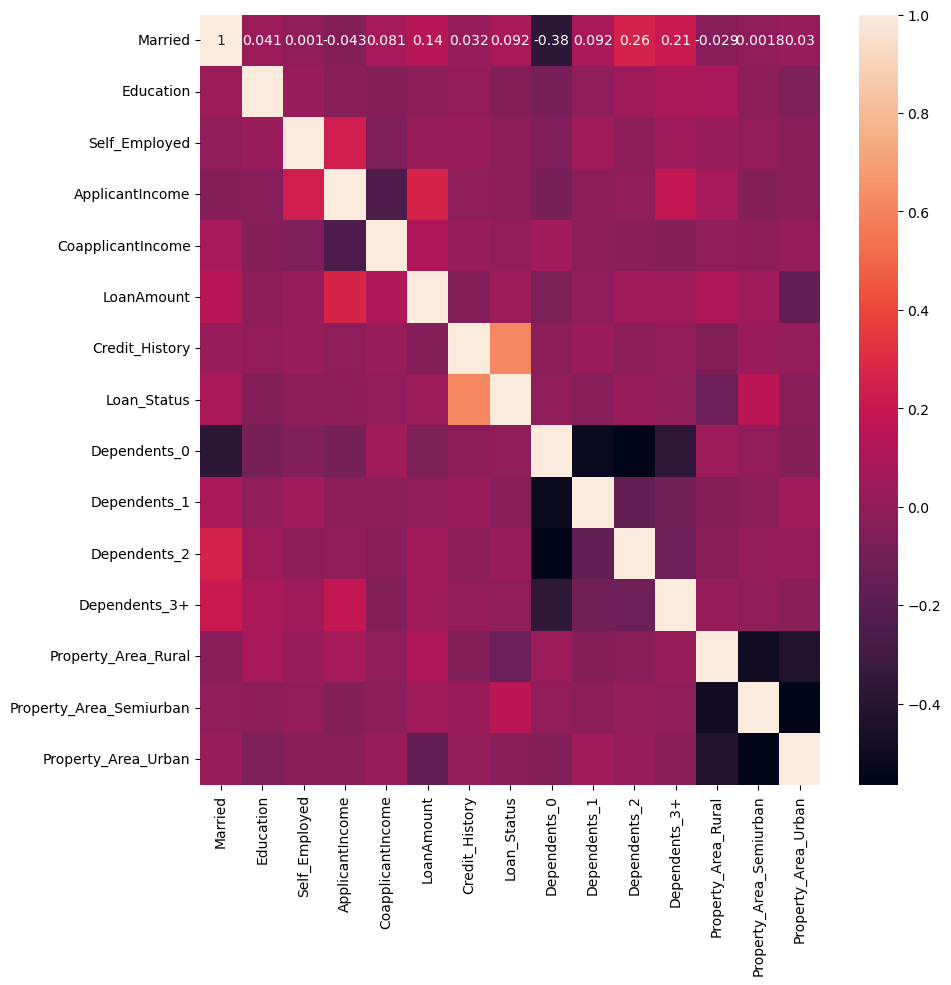

Random Forest metric: 0.7792207792207793
Logistic Regression metric: 0.8181818181818182
SVM metric: 0.7272727272727273
Decision Tree metric: 0.7532467532467533
Best model: Logistic Regression with metric: 0.8181818181818182


C:\Users\Mti.Abas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


('Logistic Regression', 0.8181818181818182)

In [7]:
read_eda=Read_And_EDA()
unclean_data=read_eda.readFile('loan_data_Copy.csv')
unclean_data.head()
clean_data=read_eda.do_EDA(unclean_data)
# Initialize AutoML and find the best model
automl = AutoML(clean_data, target_column="Loan_Status")
automl.find_best_model()